# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import prepare

In [2]:
# api import...
key = pd.read_csv("api.txt",header = None)[0][0]

In [3]:
ticker = ["AAPL"]

In [4]:
# https://financialmodelingprep.com/api/v3/ratios/AAPL?period=quarter&limit=140&apikey=key


# Scraping data from financial modeling website

In [5]:
URL = "https://financialmodelingprep.com/api/v3/"
ratios = "ratios/"
ticker = ticker[0] #currently one on the list
period = "quarter"
limit = 140
r = requests.get("{}{}{}?period={}&limit={}&apikey={}".format(URL, ratios,ticker, period,limit,key))

In [6]:
r

<Response [200]>

In [7]:
financial_ratios =pd.DataFrame.from_dict(r.json())

In [8]:
financial_ratios.head()

,symbol,date,period,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,...,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
0,AAPL,2022-12-31,Q1,0.938020,0.768724,0.149578,168.800895,9.185598,50.807736,78.007542,...,17.625873,17.208993,68.334817,60.724643,60.724643,0.369993,17.625873,0.001825,55.930784,36.401387
1,AAPL,2022-09-24,Q4,0.879356,0.709408,0.153563,246.712888,8.551997,69.385312,110.859542,...,26.750496,29.094279,115.723690,99.948201,99.948201,3.879237,26.750496,0.001536,88.464258,47.589403
2,AAPL,2022-06-25,Q3,0.864629,0.696627,0.211761,185.854820,10.387263,56.214478,92.426180,...,27.599692,29.441966,110.131931,100.019345,100.019345,-1.333548,27.599692,0.001664,89.576226,39.403907
3,AAPL,2022-03-26,Q2,0.926844,0.760039,0.220363,170.346841,8.980427,50.983758,86.649610,...,29.238186,28.430951,110.877604,100.981052,100.981052,-1.052444,29.238186,0.001264,87.470292,42.199918
4,AAPL,2021-12-25,Q1,1.037812,0.875263,0.251528,192.160595,7.587157,54.969221,96.017044,...,23.848639,21.339298,66.932039,62.937436,62.937436,0.310164,23.848639,0.001263,68.148383,41.093249


In [9]:
financial_ratios.tail()

,symbol,date,period,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,...,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
128,AAPL,1990-12-31,Q1,2.372470,1.485405,0.689453,185.931065,47.889801,93.735817,48.921454,...,3.017526,8.398447,33.109791,22.282349,22.282349,0.160316,3.017526,0.002749,14.974344,3.272193
129,AAPL,1990-09-30,Q4,2.340117,1.106719,0.364849,205.371464,54.100440,104.739979,51.832939,...,2.648347,9.101846,119.937364,36.705498,36.705498,-0.728403,2.648347,0.003597,15.004623,2.478661
130,AAPL,1990-06-30,Q3,2.637276,1.545270,0.749803,188.677828,45.427979,91.951279,43.435933,...,4.091759,11.653658,22.248737,18.503754,18.503754,-1.513509,4.091759,0.002400,20.074434,3.706154
131,AAPL,1990-03-31,Q2,2.931293,1.684877,0.834044,178.622790,49.752344,93.796320,37.541129,...,3.789120,9.675481,19.581242,16.818046,16.818046,1.159840,3.789120,0.002647,17.192138,3.289002
132,AAPL,1989-12-31,Q1,2.605018,1.298869,0.459841,183.062140,57.433059,102.571669,34.828721,...,3.242598,9.700513,24.432371,18.546518,18.546518,27.264990,3.242598,0.002891,17.828430,3.177908


In [10]:
financial_ratios['date'] = pd.to_datetime(financial_ratios['date'])


In [11]:
financial_ratios['date'] = financial_ratios['date'].dt.year


In [12]:
URL = "https://financialmodelingprep.com/api/v3/"
incstat = "income-statement/"
ticker = ticker[0] #currently one on the list
period = "quarter"
limit=400
r = requests.get("{}{}{}?period={}&limit={}&apikey={}".format(URL, incstat,ticker, period,limit,key))

In [13]:
# https://financialmodelingprep.com/api/v3/income-statement/AAPL?period=quarter&limit=400&apikey=api

In [14]:
r

<Response [200]>

In [15]:
income_statement = pd.DataFrame.from_dict(r.json())

In [16]:
income_statement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   date                                     96 non-null     object 
 1   symbol                                   96 non-null     object 
 2   reportedCurrency                         96 non-null     object 
 3   cik                                      96 non-null     object 
 4   fillingDate                              96 non-null     object 
 5   acceptedDate                             96 non-null     object 
 6   calendarYear                             96 non-null     object 
 7   period                                   96 non-null     object 
 8   revenue                                  96 non-null     int64  
 9   costOfRevenue                            96 non-null     int64  
 10  grossProfit                              96 non-null

In [17]:
# it appears that the dataframe has only 96 entries

In [18]:
income_statement.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2022-10-31,A,USD,0001090872,2022-12-21,2022-12-20 18:42:30,2022,Q4,1849000000,837000000,...,0.246079,87000000,368000000,0.199027,1.24,1.23,296000000,298000000,https://www.sec.gov/Archives/edgar/data/109087...,https://www.sec.gov/Archives/edgar/data/109087...
1,2022-07-31,A,USD,0001090872,2022-09-01,2022-08-31 18:53:26,2022,Q3,1718000000,779000000,...,0.231083,68000000,329000000,0.191502,1.10,1.10,298000000,299000000,https://www.sec.gov/Archives/edgar/data/109087...,https://www.sec.gov/Archives/edgar/data/109087...
2,2022-04-30,A,USD,0001090872,2022-05-31,2022-05-27 19:33:57,2022,Q2,1607000000,746000000,...,0.207218,59000000,274000000,0.170504,0.92,0.91,299000000,301000000,https://www.sec.gov/Archives/edgar/data/109087...,https://www.sec.gov/Archives/edgar/data/109087...
3,2022-01-31,A,USD,0001090872,2022-03-03,2022-03-03 17:02:17,2022,Q1,1674000000,764000000,...,0.190562,36000000,283000000,0.169056,0.94,0.93,301000000,303000000,https://www.sec.gov/Archives/edgar/data/109087...,https://www.sec.gov/Archives/edgar/data/109087...
4,2021-10-31,A,USD,0001090872,2021-12-17,2021-12-17 17:01:49,2021,Q4,1660000000,760000000,...,0.269880,6000000,442000000,0.266265,1.46,1.45,303000000,305000000,https://www.sec.gov/Archives/edgar/data/109087...,https://www.sec.gov/Archives/edgar/data/109087...


In [19]:
income_statement["date"] = pd.to_datetime(income_statement["date"])

In [20]:
income_statement.to_csv("apple_income_statement.csv")

In [21]:
income_statement["date"] = pd.to_datetime(income_statement["date"])

In [22]:
income_statement['date'] = income_statement['date'].dt.year


In [23]:
eps_df = income_statement[["fillingDate","date","period","eps"]]

# connect dfs together

In [24]:
new_df = pd.merge(financial_ratios, eps_df,  how='left', left_on = ["date", "period"], right_on = ["date","period"])


In [25]:
new_df.head()

,symbol,date,period,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,...,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,fillingDate,eps
0,AAPL,2022,Q1,0.938020,0.768724,0.149578,168.800895,9.185598,50.807736,78.007542,...,68.334817,60.724643,60.724643,0.369993,17.625873,0.001825,55.930784,36.401387,2022-03-03,0.94
1,AAPL,2022,Q4,0.879356,0.709408,0.153563,246.712888,8.551997,69.385312,110.859542,...,115.723690,99.948201,99.948201,3.879237,26.750496,0.001536,88.464258,47.589403,2022-12-21,1.24
2,AAPL,2022,Q3,0.864629,0.696627,0.211761,185.854820,10.387263,56.214478,92.426180,...,110.131931,100.019345,100.019345,-1.333548,27.599692,0.001664,89.576226,39.403907,2022-09-01,1.10
3,AAPL,2022,Q2,0.926844,0.760039,0.220363,170.346841,8.980427,50.983758,86.649610,...,110.877604,100.981052,100.981052,-1.052444,29.238186,0.001264,87.470292,42.199918,2022-05-31,0.92
4,AAPL,2021,Q1,1.037812,0.875263,0.251528,192.160595,7.587157,54.969221,96.017044,...,66.932039,62.937436,62.937436,0.310164,23.848639,0.001263,68.148383,41.093249,2021-03-02,0.94


In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 132
Data columns (total 59 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   symbol                              133 non-null    object 
 1   date                                133 non-null    int64  
 2   period                              133 non-null    object 
 3   currentRatio                        133 non-null    float64
 4   quickRatio                          133 non-null    float64
 5   cashRatio                           133 non-null    float64
 6   daysOfSalesOutstanding              133 non-null    float64
 7   daysOfInventoryOutstanding          133 non-null    float64
 8   operatingCycle                      133 non-null    float64
 9   daysOfPayablesOutstanding           133 non-null    float64
 10  cashConversionCycle                 133 non-null    float64
 11  grossProfitMargin                   133 non-n

In [27]:
new_df = new_df.dropna(axis=1,thresh=96)


In [28]:
new_df = new_df.dropna()

In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   symbol                              96 non-null     object 
 1   date                                96 non-null     int64  
 2   period                              96 non-null     object 
 3   currentRatio                        96 non-null     float64
 4   quickRatio                          96 non-null     float64
 5   cashRatio                           96 non-null     float64
 6   daysOfSalesOutstanding              96 non-null     float64
 7   daysOfInventoryOutstanding          96 non-null     float64
 8   operatingCycle                      96 non-null     float64
 9   daysOfPayablesOutstanding           96 non-null     float64
 10  cashConversionCycle                 96 non-null     float64
 11  grossProfitMargin                   96 non-null

In [30]:
new_df.drop(columns=["symbol","period","date"], inplace = True)


In [31]:
new_df.set_index('fillingDate', inplace = True)


In [32]:
new_df.isna().mean()

currentRatio                          0.0
quickRatio                            0.0
cashRatio                             0.0
daysOfSalesOutstanding                0.0
daysOfInventoryOutstanding            0.0
operatingCycle                        0.0
daysOfPayablesOutstanding             0.0
cashConversionCycle                   0.0
grossProfitMargin                     0.0
operatingProfitMargin                 0.0
pretaxProfitMargin                    0.0
netProfitMargin                       0.0
effectiveTaxRate                      0.0
returnOnAssets                        0.0
returnOnEquity                        0.0
returnOnCapitalEmployed               0.0
netIncomePerEBT                       0.0
ebtPerEbit                            0.0
ebitPerRevenue                        0.0
debtRatio                             0.0
debtEquityRatio                       0.0
companyEquityMultiplier               0.0
receivablesTurnover                   0.0
payablesTurnover                  

In [33]:
new_df.sort_values(by = "fillingDate", inplace = True)

# Split the data 

In [34]:
train, validate, test = prepare.split_data(new_df)


In [35]:
train.head()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,grossProfitMargin,operatingProfitMargin,...,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,enterpriseValueMultiple,priceFairValue,eps
fillingDate,,,,,,,,,,,,,,,,,,,,,
1999-04-30,2.650259,2.413212,0.879534,191.803922,1.437445,48.731562,63.167702,-14.436140,0.263399,0.051634,...,2.963618,8.396918,18.137343,16.856267,16.856267,-0.723249,2.963618,23.340880,2.084752,0.35
1999-07-31,2.792723,2.600390,1.152047,209.910141,0.557029,52.315694,63.023873,-10.708179,0.274069,0.066752,...,3.900691,7.484331,75.028104,69.059959,69.059959,0.176411,3.900691,18.565631,2.046221,0.30
1999-10-31,2.766301,2.522272,0.856036,186.051647,1.890756,47.766505,76.764706,-28.998201,0.287425,0.036677,...,7.827446,23.552856,51.769644,47.970037,47.970037,-0.464090,7.827446,63.298444,3.369030,0.33
2000-03-15,2.498219,2.316539,0.807125,138.958600,0.777650,35.041414,60.864055,-25.822641,0.259070,0.042680,...,7.066507,22.618616,49.423363,44.388275,44.388275,0.352439,7.066507,51.072999,3.750980,0.30
2000-03-15,3.009163,2.752596,1.061087,159.846077,1.838521,41.252623,55.768482,-14.515860,-0.020854,-0.417080,...,4.980540,-6.430005,-143.297250,-385.800288,-385.800288,0.029896,4.980540,-14.131511,1.351132,0.30


# Charting the ratios over time

array([[<AxesSubplot:title={'center':'currentRatio'}>,
        <AxesSubplot:title={'center':'eps'}>]], dtype=object)

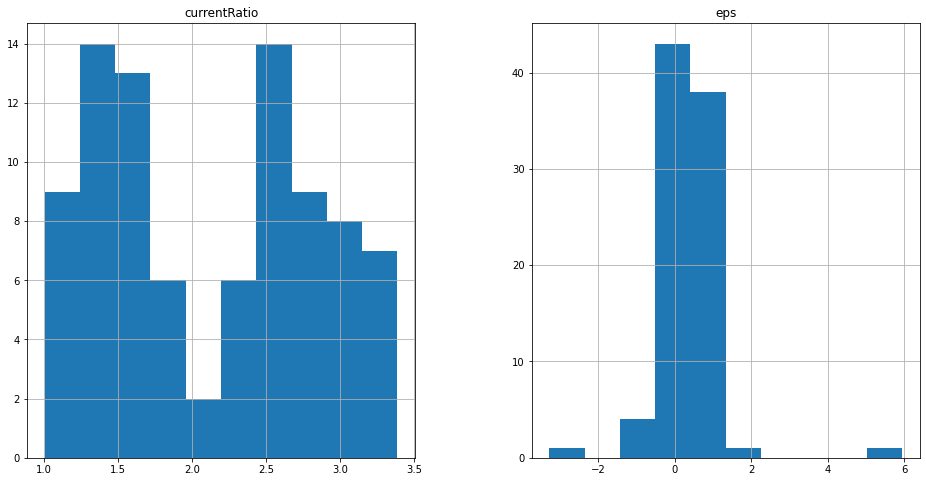

In [43]:
# plotting histograms to check distributions
import matplotlib as polt
plot_columns = train[["currentRatio", "eps"]]
plot_columns.hist(figsize=(16,8))
# plot.figure(figsize=(16,8))


In [ ]:
train[["currentRatio", "eps"]].plot(kind='bar', figsize=(15,5))


In [ ]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

for col in train.columns:
    plt.figure(figsize=(16,8))
    plt.plot(train["eps"])
    plt.plot(train[col])
    plt.ylabel(col)
    plt.title(col)
    plt.xticks(fontsize=10, rotation=90)
    plt.show()


In [ ]:
# import urllib.request, json 
# import pandas as pd

# with urllib.request.urlopen("https://financialmodelingprep.com/api/v3/company-key-metrics/AAPL?period=quarter") as url:
#     data = json.loads(url.read().decode())
#     df = pd.DataFrame(data)
# print(df)

In [44]:
train.head()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,grossProfitMargin,operatingProfitMargin,...,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,enterpriseValueMultiple,priceFairValue,eps
fillingDate,,,,,,,,,,,,,,,,,,,,,
1999-04-30,2.650259,2.413212,0.879534,191.803922,1.437445,48.731562,63.167702,-14.436140,0.263399,0.051634,...,2.963618,8.396918,18.137343,16.856267,16.856267,-0.723249,2.963618,23.340880,2.084752,0.35
1999-07-31,2.792723,2.600390,1.152047,209.910141,0.557029,52.315694,63.023873,-10.708179,0.274069,0.066752,...,3.900691,7.484331,75.028104,69.059959,69.059959,0.176411,3.900691,18.565631,2.046221,0.30
1999-10-31,2.766301,2.522272,0.856036,186.051647,1.890756,47.766505,76.764706,-28.998201,0.287425,0.036677,...,7.827446,23.552856,51.769644,47.970037,47.970037,-0.464090,7.827446,63.298444,3.369030,0.33
2000-03-15,2.498219,2.316539,0.807125,138.958600,0.777650,35.041414,60.864055,-25.822641,0.259070,0.042680,...,7.066507,22.618616,49.423363,44.388275,44.388275,0.352439,7.066507,51.072999,3.750980,0.30
2000-03-15,3.009163,2.752596,1.061087,159.846077,1.838521,41.252623,55.768482,-14.515860,-0.020854,-0.417080,...,4.980540,-6.430005,-143.297250,-385.800288,-385.800288,0.029896,4.980540,-14.131511,1.351132,0.30
